In [38]:
import pandas as pd

churn = pd.read_csv('C:\DS\IDE\Skillfactory\PY_13_Визуализация_данных\churn.csv')
churn = churn.drop(['RowNumber'], axis=1)
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


**Столбцы таблицы:**

* ***RowNumber*** — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
* ***CustomerId*** — идентификатор клиента
* ***Surname*** — фамилия клиента
* ***CreditScore*** — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
* ***Geography*** — страна клиента (банк международный)
* ***Gender*** — пол клиента
* ***Age*** — возраст клиента
* ***Tenure*** — сколько лет клиент пользуется услугами банка
* ***Balance*** — баланс на счетах клиента в банке
* ***NumOfProducts*** — количество услуг банка, которые приобрёл клиент
* ***HasCrCard*** — есть ли у клиента кредитная карта (1 — да, 0 — нет)
* ***IsActiveMember*** — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
* ***EstimatedSalary*** — предполагаемая заработная плата клиента
* ***Exited*** — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

# ЗАДАНИЯ 9.1.
### Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

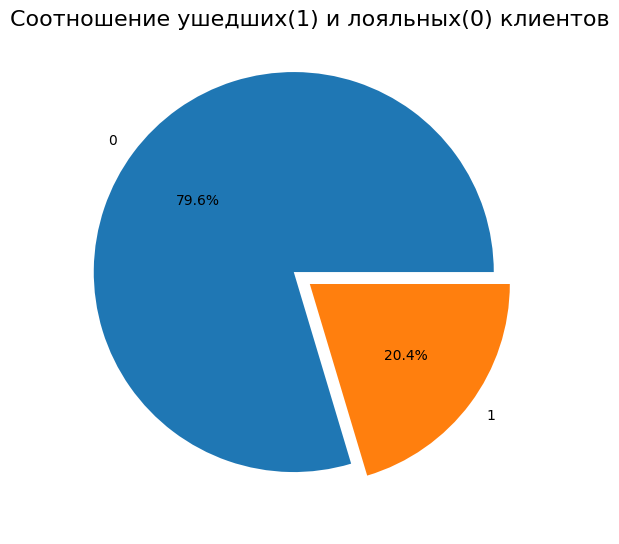

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

loyal_departed = churn['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('Cоотношение ушедших(1) и лояльных(0) клиентов', fontsize=16)

axes.pie(loyal_departed, labels=loyal_departed.index, autopct='%.1f%%', explode = [0.1, 0]);

Из графика видно, что ушло 20.4% клиентов (пятая часть)

Большая часть клиентов лояльны

# ЗАДАНИЯ 9.2.
### Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

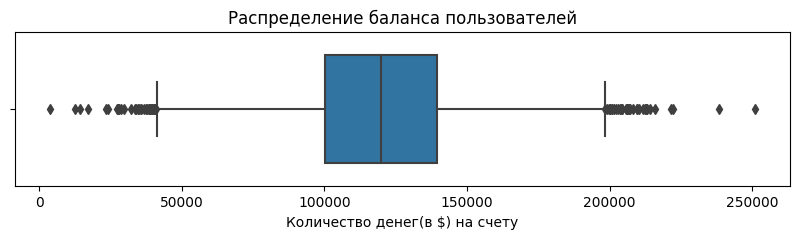

In [40]:
import seaborn as sns

balance_distribution = churn[churn['Balance'] > 2500]
balance_distribution

fig = plt.figure(figsize=(10,2))
boxplot = sns.boxplot(
    data=balance_distribution,
    x='Balance',
    width=0.7
);
boxplot.set_title('Распределение баланса пользователей');
boxplot.set_xlabel('Количество денег(в $) на счету');

По данному гравику видно что пользователи, на счету который более 2500$ распределяются следующим образом:

1. Межквартильный размах у них равен от 100 до 140 тыс.$

2. Основная масса пользователей лежит в диапазоне от 40 до 195 тыс.$

3. Есть выбросы, в обе стороны примерно одинаковы. Людей, который попали в выбросы на мин и макс не очень много

4. График сбалансирован и практически симетричен(за исключением выбросов). Мединана находится примерно на 120 тыс. $

Вывод: Большая часть пользователей банка держит на счету достаточно большие суммы. Если не считать пользователей с балансом менее 2500$
то можно заметить что баланс на счету начинается от 40 тыс. $. Более 200 тыс.$ пользователи не держат (за исключением выбросов). В основном, большая часть людей держит на счете в банке от 100 до 140 тыс. $

# ЗАДАНИЯ 9.3.
### Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

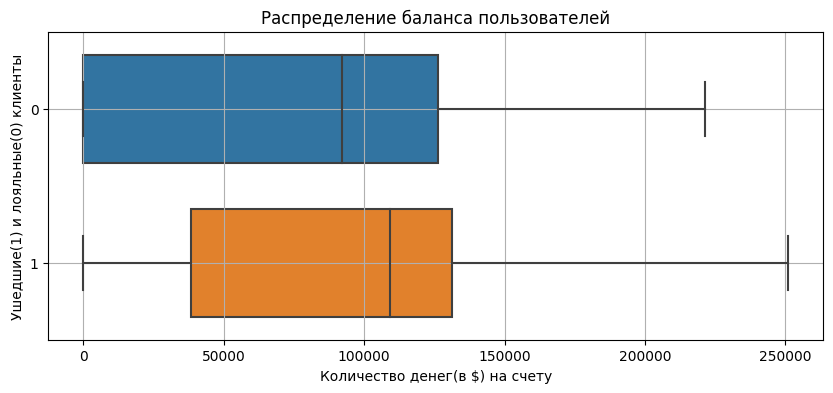

In [41]:
fig = plt.figure(figsize=(10,4))
boxplot = sns.boxplot(
    data=churn,
    x='Balance',
    y='Exited',
    orient='h',
    width=0.7
);
boxplot.set_title('Распределение баланса пользователей');
boxplot.set_xlabel('Количество денег(в $) на счету');
boxplot.set_ylabel('Ушедшие(1) и лояльные(0) клиенты');
boxplot.grid()

По графику видно что и медиальное значение и межквартиьный размах и "усы" больше у клиентов ушедших, следовательно ушедшие клиенты хранили суммы, превышаюшие суммы лояьных клиентов

Это может быть связано с дополнительными комиссиями на хранение больших сумм в банке

С более выгодными условиями хранения денег в других банках (например % годовых больше)

Возможно есть какието ограничения по максимальной сумме, которая может лежать в банке на 1 человека (по графику ушедших клиентов видно, что предел стоит на 250 тыс $ с небольшим, может это и есть предел суммы)



# ЗАДАНИЯ 9.4.
### Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

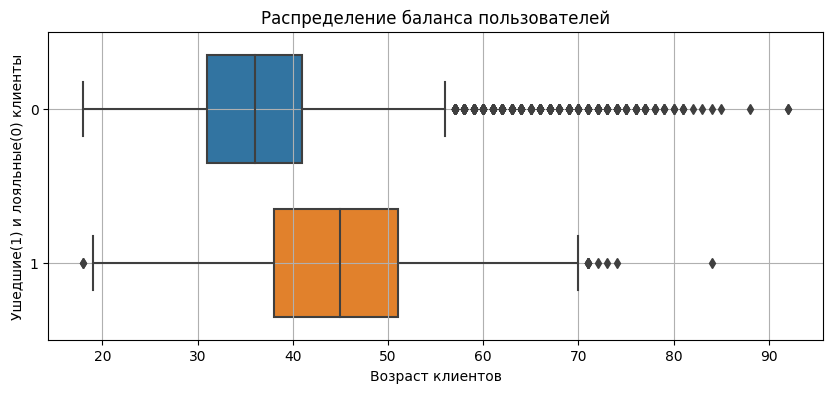

In [42]:
fig = plt.figure(figsize=(10,4))
boxplot = sns.boxplot(
    data=churn,
    x='Age',
    y='Exited',
    orient='h',
    width=0.7
);
boxplot.set_title('Распределение баланса пользователей');
boxplot.set_xlabel('Возраст клиентов');
boxplot.set_ylabel('Ушедшие(1) и лояльные(0) клиенты');
boxplot.grid()

Больше выбросов у лояльных клиентов

Но основная масса ушедших клиентов старше 38 и младше 51 года

Банку стоит обратить внимание на клиентов от 31 до 52 года, т.к нельзя забывать и про лояльных клиентов. (есть какието моменты, которые не устраивают старшее поколение 30+) Видимо банк ориенторован больше на молодежь


# ЗАДАНИЯ 9.5.
### Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

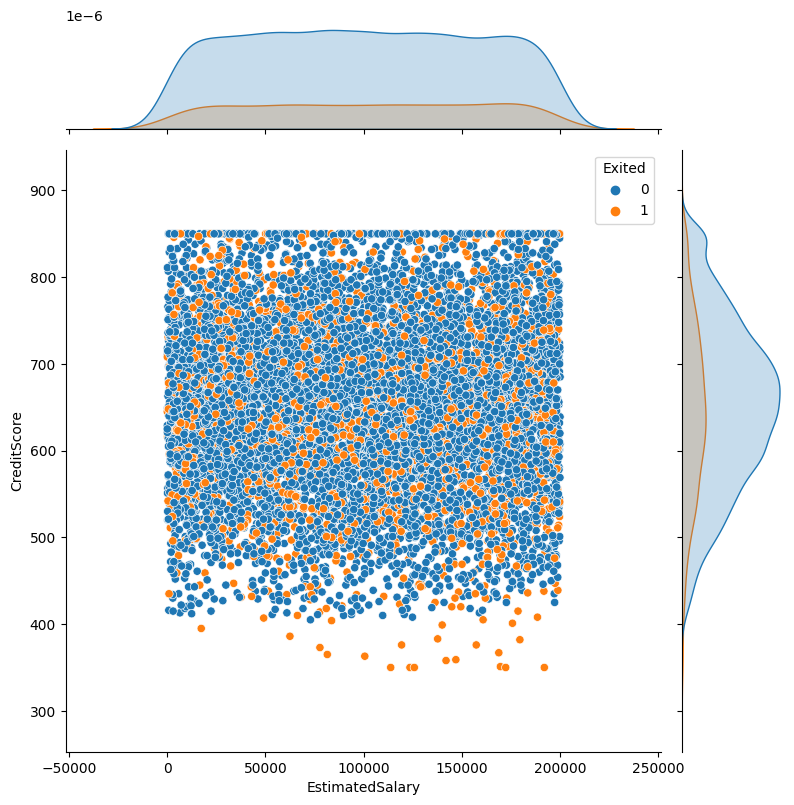

In [67]:
jointplot = sns.jointplot(
    data=churn, 
    x='EstimatedSalary', 
    y='CreditScore',
    hue='Exited',
    height=8,
)

Лояльные клиенты = 0

Ушедшие клиенты = 1

Из графика видно, что предполагаемая зарплата никак не зависит от кредитного рейтинга как у ушедших, так и у лояльных клиентов.

Так как лояльных клиентов в банке больше, то и синих точек на графике таже будет больше

В основном кредитная история у клинтов в районе 600-700 баллов



